In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [36]:
fname='density_projection.dat'
d=np.fromfile(fname,dtype=np.float32)
d=np.reshape(d, (512,512))

In [37]:
fname='energy_projection.dat'
energy=np.fromfile(fname,dtype=np.float32)
energy=np.reshape(energy,(512,512))

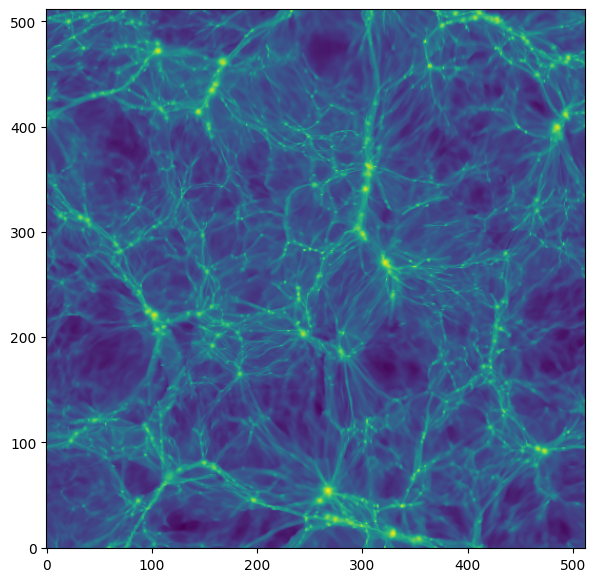

In [38]:
d_log=np.log10(d)
f=plt.figure(figsize=(7,7))
plt.imshow(d_log,origin='lower')

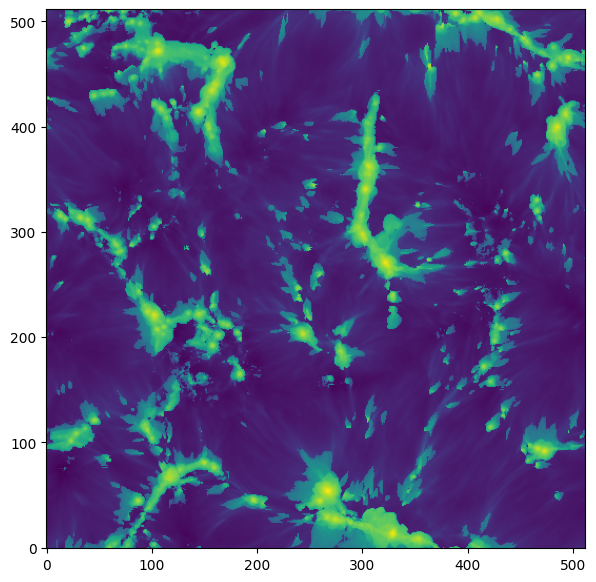

In [39]:
e_log=np.log10(energy)
f=plt.figure(figsize=(7,7))
plt.imshow(e_log,origin='lower')

In [40]:
d_min=d_log.min()
d_max=d_log.max()

v= (d_log-d_min)/(d_max-d_min)
s=1.0-v

In [41]:
e_min=e_log.min()
e_max=e_log.max()

h=0.8-0.2*(e_log-e_min)/(e_max-e_min)

In [42]:
hsv_image= np.zeros((512,512,3))

hsv_image[:,:,0]=h
hsv_image[:,:,1]=s
hsv_image[:,:,2]=v

rgb_image=colors.hsv_to_rgb(hsv_image)

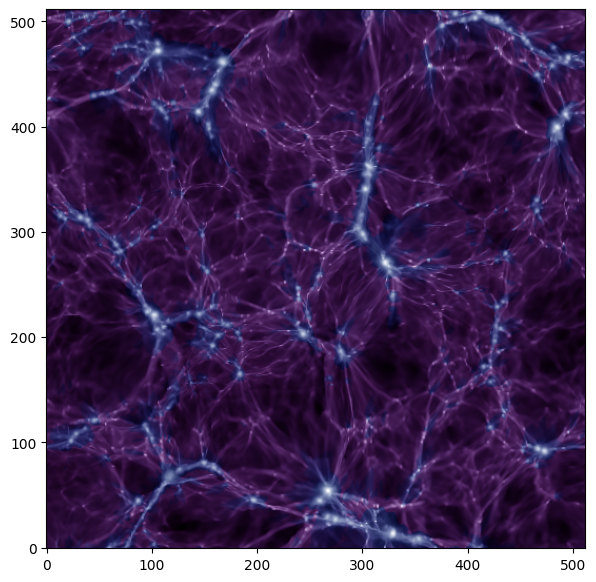

In [43]:
f=plt.figure(figsize=(7,7))
plt.imshow(rgb_image,origin='lower')

In [44]:
plt.imsave("test.png", rgb_image)

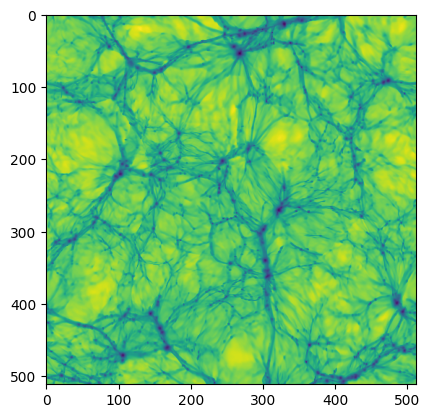

In [45]:
plt.imshow(s)

In [46]:
from astropy.io import fits

In [47]:
fdata_F277W="F277W_cutout.fits"
fdata_F356W="F356W_cutout.fits"
fdata_F444W="F444W_cutout.fits"

hdu_2=fits.open(fdata_F277W)
hdu_3=fits.open(fdata_F356W)
hdu_4=fits.open(fdata_F444W)

data_2=hdu_2[0].data
data_3=hdu_3[0].data
data_4=hdu_4[0].data

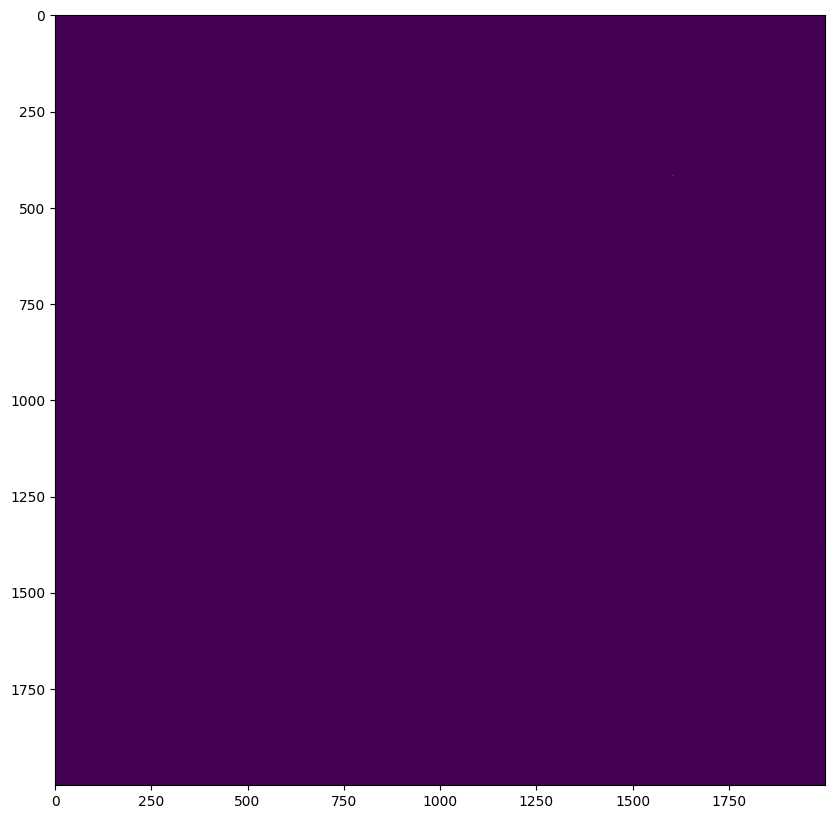

In [48]:
f=plt.figure(figsize=(10,10))
plt.imshow(data_2)

In [49]:
def rescale_image(data):
    pdata_tmp=data.copy()
    m=np.nanmean(pdata_tmp)
    vplmin=m/2.
    vpmin=np.log10(vplmin)
    vpmax=np.log10(m*100.)
    pdata_tmp[pdata_tmp<vplmin]=vplmin
    pdata_tmp=np.log10(pdata_tmp)
    return pdata_tmp,vpmin,vpmax

In [50]:
def fits_quicklook(data,fnx=10,fny=10):
    f=plt.figure(figsize=(fnx,fny))
    pdata_tmp,vpmin,vpmax=rescale_image(data)
    plt.imshow(pdata_tmp,vmin=vpmin, vmax=vpmax)

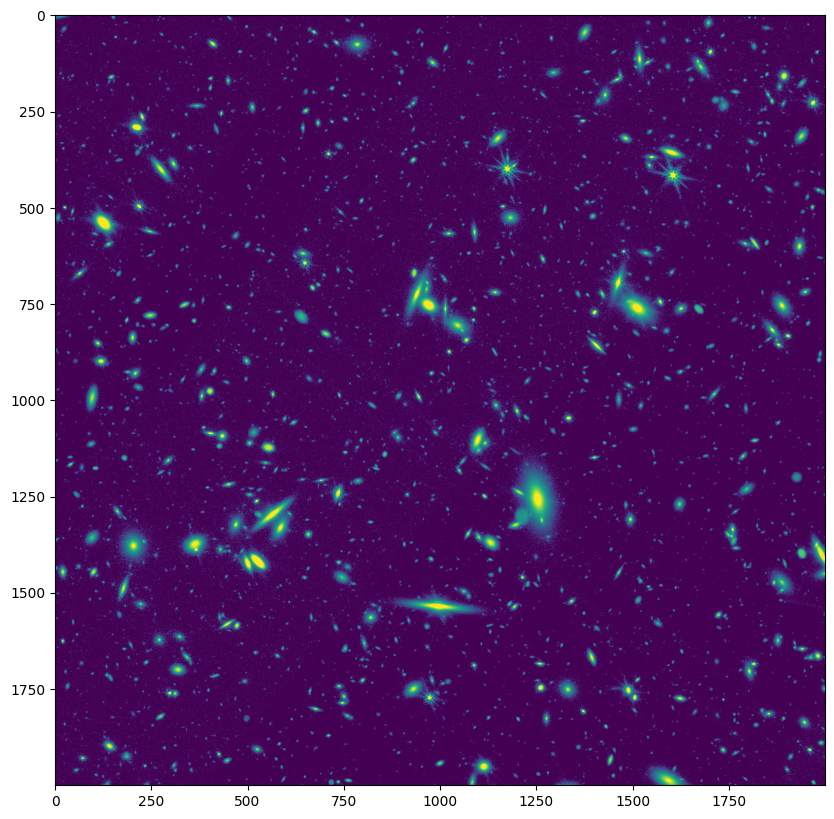

In [51]:
fits_quicklook(data_2)

In [52]:
data_2_res, d2min,d2max=rescale_image(data_2)
data_3_res, d3min,d3max=rescale_image(data_3)
data_4_res, d4min,d4max=rescale_image(data_4)

In [53]:
data_2_res[data_2_res<d2min]=d2min
data_2_res[data_2_res>d2max]=d2max
data_3_res[data_3_res<d3min]=d3min
data_3_res[data_3_res>d3max]=d3max
data_4_res[data_4_res<d4min]=d4min
data_4_res[data_4_res>d4max]=d4max

In [54]:
rgb=np.zeros((data_2_res.shape[0],data_2_res.shape[1],3))
rgb[:,:,0]=(data_2_res-d2min)/(d2max-d2min)
rgb[:,:,1]=(data_3_res-d3min)/(d3max-d3min)
rgb[:,:,2]=(data_4_res-d4min)/(d4max-d4min)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


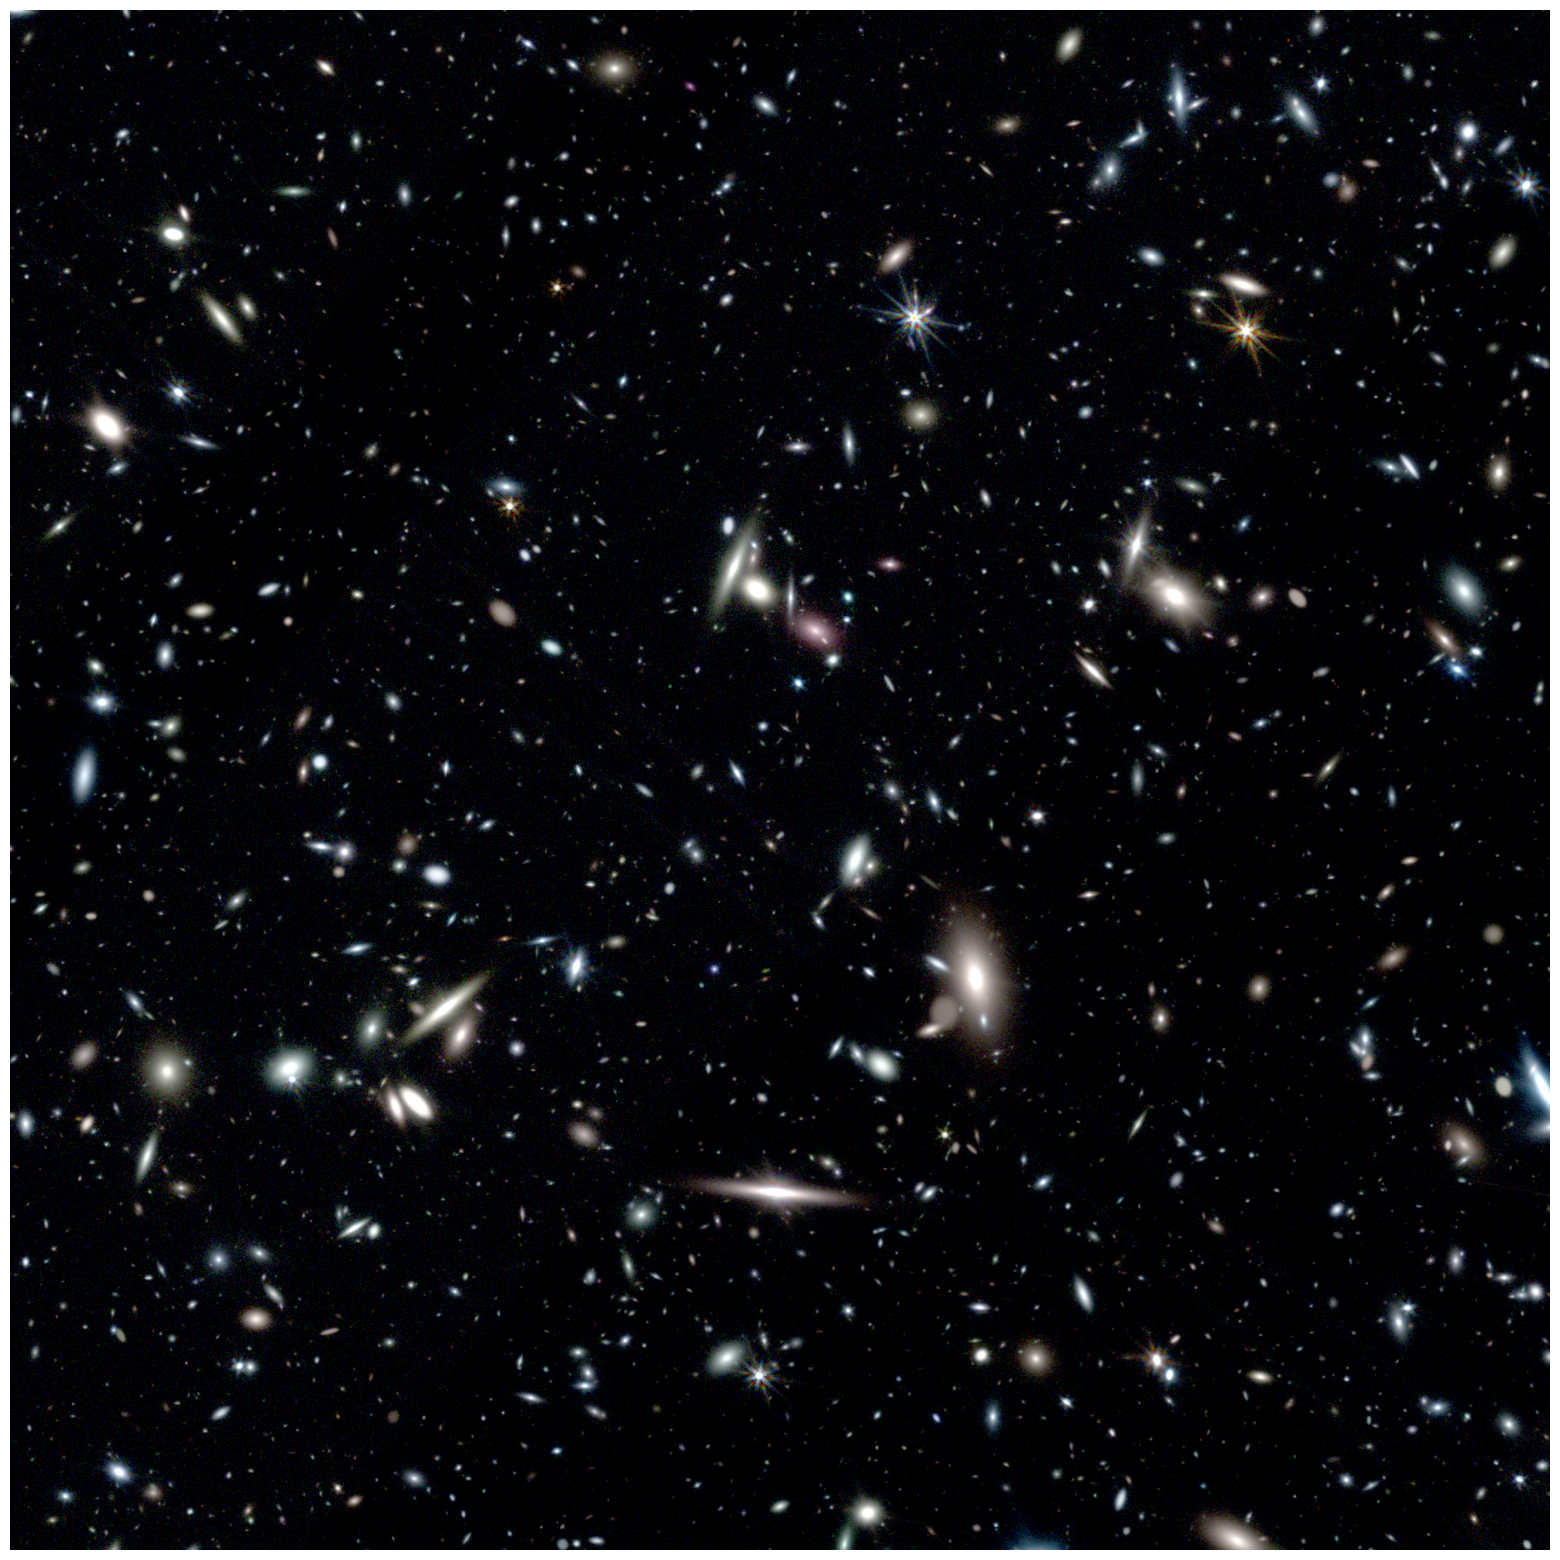

In [55]:
f,ax=plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb)
plt.savefig('jwst_image.png', bbox_inches='tight',pad_inches=0,dpi=600)